In [77]:
import pandas as pd
import numpy as np
from urllib2 import urlopen
from bs4 import BeautifulSoup
from requests import get

In [137]:
url = "https://www.liputan6.com/tag/kementerian-pupr"
html = urlopen(url)

In [138]:
soup = BeautifulSoup(html, 'lxml')

In [139]:
type(soup)

bs4.BeautifulSoup

In [140]:
title = soup.title
print(title)

<title>Berita Kementerian PUPR Hari Ini - Kabar Terbaru Terkini | Liputan6.com</title>


In [142]:
Liputan6_container = soup.find_all('article')

In [144]:
Liputan6_container

[<article class="articles--iridescent-list--item articles--iridescent-list--text-item" data-channel="Bisnis" data-component-name="desktop:articles:iridescent-list:text-item" data-slug="harga-rumah-subsidi-bakal-naik-hingga-775-persen" data-template-name="article-iridescent-list-text" data-template-var="container" data-type="TextTypeArticle" id="article_3877269"><figure class="articles--iridescent-list--text-item__figure-thumbnail"><a class="ui--a articles--iridescent-list--text-item__figure-thumbnail-link" data-kanal-page="bisnis" data-template-var="url" href="https://www.liputan6.com/bisnis/read/3877269/harga-rumah-subsidi-bakal-naik-hingga-775-persen" title="Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen"><picture class="articles--iridescent-list--text-item__figure-image"><source data-template-var="source-webp" srcset="https://cdn1-production-images-kly.akamaized.net/2KjlUC6LWr0-WyW_uBw1A8n3JyI=/200x112/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias

In [145]:
print(len(Liputan6_container))

21


In [146]:
Liputan6_container1 = Liputan6_container[0]

In [147]:
Liputan6_container1

<article class="articles--iridescent-list--item articles--iridescent-list--text-item" data-channel="Bisnis" data-component-name="desktop:articles:iridescent-list:text-item" data-slug="harga-rumah-subsidi-bakal-naik-hingga-775-persen" data-template-name="article-iridescent-list-text" data-template-var="container" data-type="TextTypeArticle" id="article_3877269"><figure class="articles--iridescent-list--text-item__figure-thumbnail"><a class="ui--a articles--iridescent-list--text-item__figure-thumbnail-link" data-kanal-page="bisnis" data-template-var="url" href="https://www.liputan6.com/bisnis/read/3877269/harga-rumah-subsidi-bakal-naik-hingga-775-persen" title="Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen"><picture class="articles--iridescent-list--text-item__figure-image"><source data-template-var="source-webp" srcset="https://cdn1-production-images-kly.akamaized.net/2KjlUC6LWr0-WyW_uBw1A8n3JyI=/200x112/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/

In [148]:
Liputan6_container1.aside

<aside class="articles--iridescent-list--text-item__details"><header class="articles--iridescent-list--text-item__header"><a class="articles--iridescent-list--text-item__category" data-template-var="category" href="https://www.liputan6.com/bisnis/ekonomi">Ekonomi</a><span class="articles--iridescent-list--text-item__datetime" data-template-var="date"><time class="articles--iridescent-list--text-item__time timeago" datetime="2019-01-22T20:00:44+07:00">22 Jan 2019 20:00</time></span><h4 class="articles--iridescent-list--text-item__title"><a class="ui--a articles--iridescent-list--text-item__title-link" data-kanal-page="bisnis" data-template-var="url" href="https://www.liputan6.com/bisnis/read/3877269/harga-rumah-subsidi-bakal-naik-hingga-775-persen" title="Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen"><span class="articles--iridescent-list--text-item__title-link-text" data-template-var="title">Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen</span></a></h4></header><div class="arti

In [152]:
Liputan6_container1.aside.header.h4.a.span.text

u'Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen'

In [154]:
Liputan6_container1.aside.div.text

u'Kementerian PUPR masih menunggu Kementerian Keuangan untuk dongkrak harga rumah subsidi.'

In [155]:
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output

In [156]:
pages = [str(i) for i in range(1,15)]

In [157]:
newstitles = []
newsdescriptions = []

In [158]:
start_time = time()
requests = 0

In [165]:
for page in pages:
    # Make a get request
    response = get('https://www.liputan6.com/tag/kementerian-pupr?page=' + page)
    
    sleep(randint(8,15))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    soup1 = BeautifulSoup(response.text, 'html.parser')
    
    news_container = soup1.find_all('article')
    
    for news in news_container:
        if news.find('aside', class_='articles--iridescent-list--text-item__details') is not None:
            newstitle = news.header.h4.a.span.text
            newstitles.append(newstitle)
            
            newsdesc = news.div.text
            newsdescriptions.append(newsdesc)
            
            

Request: 42; Frequency: 0.0284378526312 requests/s


In [166]:
liputan6news = pd.DataFrame({"newstitle":newstitles,
                            "newsdesc":newsdescriptions})

In [167]:
liputan6news

,newsdesc,newstitle
0,Kementerian PUPR masih menunggu Kementerian Ke...,"Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen"
1,Mulai 21 Januari 2019 hingga dua bulan ke depa...,"Diskon 15 Persen, Tarif Tol Trans Jawa Jakarta..."
2,Menteri Basuki menyaksikan masih banyak sampah...,Menteri Basuki Minta Warga Tak Buang Sampah di...
3,Kehadiran Bendungan Mila akan melengkapi Bendu...,"Mulai Penggenangan, Bendungan Mila Pasok Air k..."
4,"Pada tahun 2019, Kementerian PUPR kembali mela...",17.500 Rumah MBR di Padang Nikmati Program Hib...
5,Pembangunan infrastruktur di pulau-pulau terde...,Pembangunan Jalan dan Jembatan Tumbuhkan Sentr...
6,Diharapkan dalam Triwulan I 2019 jalan tol Med...,Tol Medan-Kualanamu-Tebing Tinggi Seksi 7 Siap...
7,Kementerian PUPR menyiapkan sejumlah langkah s...,Kementerian PUPR Imbau Pemda Optimalkan Tempat...
8,"Selain Widiarto, satu saksi lain juga dipanggi...",KPK Periksa 2 Saksi Terkait Kasus Suap Proyek ...
9,Kementerian PUPR terus membangun jalan Trans P...,Kementerian PUPR Rampungkan Ruas Jalan Jayapur...


In [180]:
liputan6news = liputan6news.drop(columns=['media'])

In [181]:
liputan6news.insert(0, "media", "Liputan6")

In [276]:
liputan6news.to_csv('liputan6news.csv')

In [277]:
liputan6news = pd.read_csv('liputan6news.csv')

In [278]:
liputan6news['titledesc'] = liputan6news[['newsdesc', 'newstitle']].apply(lambda x: ' '.join(x), axis=1)



In [279]:
liputan6news

,Unnamed: 0,Unnamed: 0.1,newsdesc,newstitle,titledesc
0,0,0,Kementerian PUPR masih menunggu Kementerian Ke...,"Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen",Kementerian PUPR masih menunggu Kementerian Ke...
1,1,1,Mulai 21 Januari 2019 hingga dua bulan ke depa...,"Diskon 15 Persen, Tarif Tol Trans Jawa Jakarta...",Mulai 21 Januari 2019 hingga dua bulan ke depa...
2,2,2,Menteri Basuki menyaksikan masih banyak sampah...,Menteri Basuki Minta Warga Tak Buang Sampah di...,Menteri Basuki menyaksikan masih banyak sampah...
3,3,3,Kehadiran Bendungan Mila akan melengkapi Bendu...,"Mulai Penggenangan, Bendungan Mila Pasok Air k...",Kehadiran Bendungan Mila akan melengkapi Bendu...
4,4,4,"Pada tahun 2019, Kementerian PUPR kembali mela...",17.500 Rumah MBR di Padang Nikmati Program Hib...,"Pada tahun 2019, Kementerian PUPR kembali mela..."
5,5,5,Pembangunan infrastruktur di pulau-pulau terde...,Pembangunan Jalan dan Jembatan Tumbuhkan Sentr...,Pembangunan infrastruktur di pulau-pulau terde...
6,6,6,Diharapkan dalam Triwulan I 2019 jalan tol Med...,Tol Medan-Kualanamu-Tebing Tinggi Seksi 7 Siap...,Diharapkan dalam Triwulan I 2019 jalan tol Med...
7,7,7,Kementerian PUPR menyiapkan sejumlah langkah s...,Kementerian PUPR Imbau Pemda Optimalkan Tempat...,Kementerian PUPR menyiapkan sejumlah langkah s...
8,8,8,"Selain Widiarto, satu saksi lain juga dipanggi...",KPK Periksa 2 Saksi Terkait Kasus Suap Proyek ...,"Selain Widiarto, satu saksi lain juga dipanggi..."
9,9,9,Kementerian PUPR terus membangun jalan Trans P...,Kementerian PUPR Rampungkan Ruas Jalan Jayapur...,Kementerian PUPR terus membangun jalan Trans P...


In [280]:
liputan6news = liputan6news.drop(columns=['Unnamed: 0'])
liputan6news = liputan6news.drop(columns=['Unnamed: 0.1'])

In [281]:
liputan6news.insert(0, "media", "Liputan6")

In [282]:
liputan6news

,media,newsdesc,newstitle,titledesc
0,Liputan6,Kementerian PUPR masih menunggu Kementerian Ke...,"Harga Rumah Subsidi Bakal Naik hingga 7,75 Persen",Kementerian PUPR masih menunggu Kementerian Ke...
1,Liputan6,Mulai 21 Januari 2019 hingga dua bulan ke depa...,"Diskon 15 Persen, Tarif Tol Trans Jawa Jakarta...",Mulai 21 Januari 2019 hingga dua bulan ke depa...
2,Liputan6,Menteri Basuki menyaksikan masih banyak sampah...,Menteri Basuki Minta Warga Tak Buang Sampah di...,Menteri Basuki menyaksikan masih banyak sampah...
3,Liputan6,Kehadiran Bendungan Mila akan melengkapi Bendu...,"Mulai Penggenangan, Bendungan Mila Pasok Air k...",Kehadiran Bendungan Mila akan melengkapi Bendu...
4,Liputan6,"Pada tahun 2019, Kementerian PUPR kembali mela...",17.500 Rumah MBR di Padang Nikmati Program Hib...,"Pada tahun 2019, Kementerian PUPR kembali mela..."
5,Liputan6,Pembangunan infrastruktur di pulau-pulau terde...,Pembangunan Jalan dan Jembatan Tumbuhkan Sentr...,Pembangunan infrastruktur di pulau-pulau terde...
6,Liputan6,Diharapkan dalam Triwulan I 2019 jalan tol Med...,Tol Medan-Kualanamu-Tebing Tinggi Seksi 7 Siap...,Diharapkan dalam Triwulan I 2019 jalan tol Med...
7,Liputan6,Kementerian PUPR menyiapkan sejumlah langkah s...,Kementerian PUPR Imbau Pemda Optimalkan Tempat...,Kementerian PUPR menyiapkan sejumlah langkah s...
8,Liputan6,"Selain Widiarto, satu saksi lain juga dipanggi...",KPK Periksa 2 Saksi Terkait Kasus Suap Proyek ...,"Selain Widiarto, satu saksi lain juga dipanggi..."
9,Liputan6,Kementerian PUPR terus membangun jalan Trans P...,Kementerian PUPR Rampungkan Ruas Jalan Jayapur...,Kementerian PUPR terus membangun jalan Trans P...


In [283]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [285]:
liputan6news.isnull().sum()

media        0
newsdesc     0
newstitle    0
titledesc    0
dtype: int64

In [286]:
liputan6news['newstitle'] = liputan6news['newstitle'].str.replace('?', '')
liputan6news['newstitle'] = liputan6news['newstitle'].str.replace(',', '')
liputan6news['newstitle'] = liputan6news['newstitle'].str.replace('.', '')



In [287]:
liputan6news['newsdesc'] = liputan6news['newsdesc'].str.replace('?', '')
liputan6news['newsdesc'] = liputan6news['newsdesc'].str.replace(',', '')
liputan6news['newsdesc'] = liputan6news['newsdesc'].str.replace('.', '')


In [288]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('?', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace(',', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('.', '')


In [289]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace(')', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('(', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('2018', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('yang', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('untuk', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('pada', '')



In [290]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('2019', '')


In [291]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace(' akan ', '', regex=False)


In [292]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace(' di ', '', regex=False)
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace(' dan ', '', regex=False)


In [300]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('dari', '')
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('Rp', '')


In [308]:
liputan6news['titledesc'] = liputan6news['titledesc'].str.replace('dalam', '')


In [309]:
liputan6news_text = [text for text in liputan6news[liputan6news['media'] == 'Liputan6']
['titledesc']]


In [310]:
liputan6news_text

['Kementerian PUPR masih menunggu Kementerian Keuangan  dongkrak harga rumah subsidi Harga Rumah Subsidi Bakal Naik hingga 775 Persen',
 'Mulai 21 Januari  hingga dua bulan ke depan tarif Tol Trans Jawa jugadiberlakukan diskon 15 persen Diskon 15 Persen Tarif Tol Trans Jawa Jakarta-Pasuruan Cuma  624500',
 'Menteri Basuki menyaksikan masih banyak sampah  masuk ke badan sungaimenumpukBendung Copong Menteri Basuki Minta Warga Tak Buang SampahSungaiBendungan',
 'Kehadiran Bendungan Milamelengkapi Bendungan Tanju  merupakan bagian  Sistem Irigasi Rababaka Komplek Mulai Penggenangan Bendungan Mila Pasok Air ke 1689 Ha Lahan IrigasiDompu',
 'Pada tahun  Kementerian PUPR kembali melanjutkan Program Hibah Air Minum PerkotaanPerdesaan dengan anggaran sebesar  850 miliar 17500 Rumah MBRPadang Nikmati Program Hibah Air Minum',
 'Pembangunan infrastrukturpulau-pulau terdepan Indonesia dilakukan Kementerian PUPR melalui pendekatan kewilayahan melalui Wilayah Pengembangan Strategis WPS 35 Pembanguna

In [311]:
import nltk
from nltk.tokenize import word_tokenize

In [312]:
joint_words = ' '.join(liputan6news_text)

separated_words = word_tokenize(joint_words)

In [313]:
liputan6_counts = Counter(separated_words)

In [316]:
liputan6_common_words = [word[0] for word in liputan6_counts.most_common(9)]
liputan6_common_counts = [word[1] for word in liputan6_counts.most_common(9)]


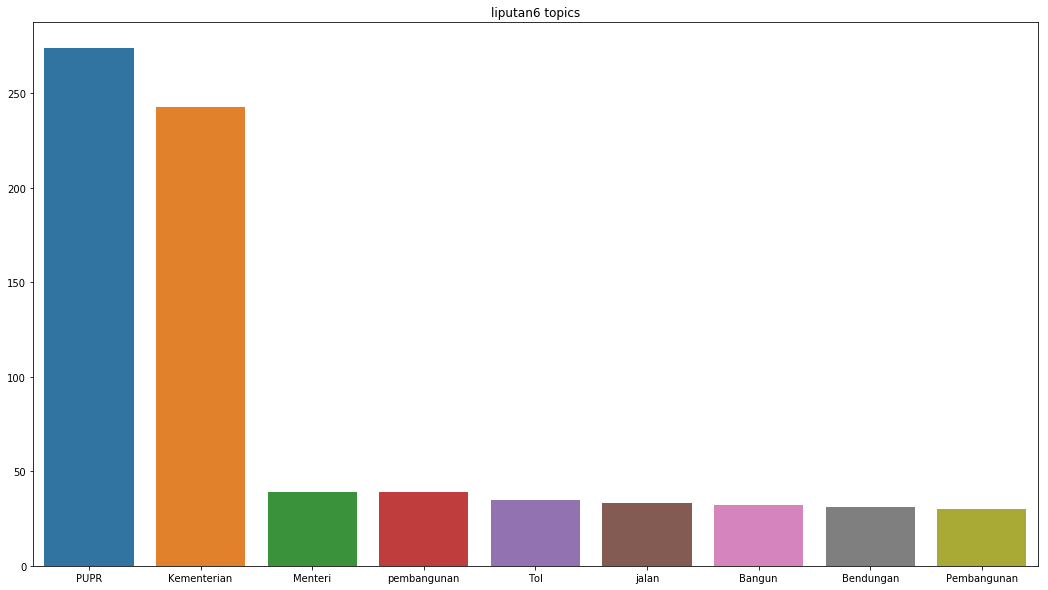

In [317]:
fig = plt.figure(figsize=(18,10))
sns.barplot(x=liputan6_common_words, y=liputan6_common_counts)
plt.title('liputan6 topics')
plt.show()